In [8]:
from manim import *

In [9]:
config.media_width = "75%"
config.verbosity = "WARNING"
config.background_color = "#24043d"

In [10]:
import sys
import os

# Configuración del directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Directorio raíz
# Configuración de las rutas
sys.path.append(os.path.join(project_root, 'src'))  # Agregar 'src' al path para importaciones

In [4]:
import herramientas as h

In [5]:
#import funciones as f

In [11]:
 
def get_x(coord_x):
    if coord_x < 0:
        return LEFT * abs(coord_x)
    else:
        return RIGHT * coord_x

def get_y(coord_y):
    if coord_y < 0:
        return DOWN * abs(coord_y)
    else:
        return UP * coord_y

def crear_codo(x_punto,  y_punto, color=WHITE, width=4, invertido=False):
    """cada punto tiene dos coordenadas 'x' e 'y' que son punto[0] y punto[1] respectivamente"""
    if invertido:
        coord_x = get_y(x_punto[1])
        coord_y = get_x(y_punto[0])
    else:
        coord_x = get_x(x_punto[0])
        coord_y = get_y(y_punto[1])
    punto_i = Point()
    punto_i.move_to(coord_x + coord_y)

    linea1 = Line(x_punto, punto_i, color = color, stroke_width = width)
    linea2 = Line(y_punto, punto_i, color = color, stroke_width = width)
    codo = VGroup(*[linea1, linea2])

    return codo

In [12]:
%%manim -ql ElseIf
class ElseIf(MovingCameraScene): 
#class MiClase(MovingCameraScene):
    
    def construct(self):
        # Obtener el tamaño de la pantalla
        ancho = self.camera.frame_width
        alto = self.camera.frame_height

        # Añadir logo
        logo = h.Logo()
        self.add(logo)


        def crear_codigo(un_texto, movimiento):
            codigo = Code(code = un_texto, tab_width = 2.25, background = "window",language = "Python", font="Monospace", font_size = 24)
            codigo.move_to(movimiento)
            return codigo

        def generar_snippet(mi_codigo):
            """Versión generador de crear_snippet"""
            for i in range(len(mi_codigo[2])):
                chars_por_seg = len(mi_codigo[2][i]) / 10
                # Animar otros objetos aquí, según sea necesario
                yield self.play(FadeIn(mi_codigo[1][i]))
                yield self.play(AddTextLetterByLetter(mi_codigo[2][i], run_time=chars_por_seg, rate_func=linear))
            self.wait(1)

        def avanzar_snippet(generador):
            for i in range(2):
                valor = next(generador) #  Obtener valores del generador, el primero es el número de fila, luego viene la línea
            # no hace falta la notación "self."" porque ya está hecho en el generador
                valor 

        #grilla = h.GrillaRegla()
        #self.add(grilla)
        #### Iniciar animación
        # guardar el estado de la escena, sirve para volver a este punto con Restore()
        self.camera.frame.save_state()

        ############### Crear codigo
        mov = 1.3 * UP + 3.8 * LEFT 
        titulo = Text("Estructuras de control", font = "Arial Black").scale(0.8).shift(3.5*UP + LEFT * 3.5)
        titulo2 = Text("Estructura If-Else", font = "Arial Black").scale(0.8).shift(3.5*UP + LEFT * 3.5)
        # Crear el subrayado
        subrayado = Line(titulo.get_left(), titulo.get_right(),color=WHITE).shift(0.30*DOWN)
        subrayado2 = Line(titulo2.get_left(), titulo2.get_right(),color=WHITE).shift(0.30*DOWN)
        codigo = crear_codigo("""x = 10
if x % 2 == 0:
   print('x es par')
else:
   print('x es impar')
""", mov)
        codigo2 = codigo.copy()
        # poner en escena el título
        
        self.play(Write(titulo), Write(subrayado))
        self.wait(5)
        self.play(FadeTransform(titulo, titulo2), FadeTransform(subrayado, subrayado2))
        # Añado la ventana de código (solo la ventana), luego creo el contenido. Es una forma de desdoblar la animación del objeto Code().
        self.add(codigo[0], codigo2[0])
        # Al crear la snippet se crea la animación de las líneas de código
        # Crear un generador con mi código. Existen dos objetos dentro de cada línea de Code(). Primero el número, después la línea
        gen = generar_snippet(codigo2)
        # Generar primera línea de código
        avanzar_snippet(gen)
        self.wait(3)
        avanzar_snippet(gen)
        self.wait(3)
        avanzar_snippet(gen)
        self.wait(3)
        avanzar_snippet(gen)
        self.wait(3)
        avanzar_snippet(gen)
        self.wait(5)
        self.play(FadeOut(codigo2))

        ############# Crear el flujograma
        # Crear los rectángulos "#840000"ondeados
        inicio = RoundedRectangle(width=1.5, height=0.62, corner_radius=0.25, color=WHITE, fill_color = "#3b9d5a", fill_opacity=1)
        fin = RoundedRectangle(width=2, height=0.62, corner_radius=0.25, color=WHITE, fill_color = "#840000", fill_opacity=1)
#(side_length=lado,color=color_trazo, fill_color=color,fill_opacity=1, stroke_width=trazo)
        # Crear el rombo
        vertex_up = UP * 1.5
        vertex_down = ORIGIN
        vertex_left = (vertex_up + vertex_down) / 2 - 1.5 * RIGHT
        vertex_right = (vertex_up + vertex_down) / 2 + 1.5 * RIGHT

        # Crear el rombo
        condicion = Polygon(vertex_up, vertex_right, vertex_down, vertex_left, color="#4636c9", fill_opacity=1, stroke_color=WHITE, stroke_width=3)

        # Crear los rectángulos azules
        bloque_if = Rectangle(width=2.25, height=0.65, color=WHITE, fill_color = "#4636c9", fill_opacity=1)
        bloque_else = Rectangle(width=2.25, height=0.65, color=WHITE, fill_color = "#4636c9", fill_opacity=1)

        # Posicionar los elementos
        inicio.move_to(3.25 * UP + 0.5 * LEFT)
        fin.next_to(inicio, DOWN, buff=6)
        
        condicion.next_to(inicio, DOWN, buff=1.25)
        bloque_if.next_to(inicio, DOWN, buff=3.75)
        bloque_else.next_to(inicio, RIGHT, buff=1.5).shift(5*DOWN)

        gap = 0.06
        codo1 = crear_codo(bloque_else.get_top()  + gap * UP, condicion.get_right())
        codo2 = crear_codo(bloque_else.get_bottom(), fin.get_right() + gap * RIGHT)
        
        linea1 = Line(inicio.get_bottom(),  condicion.get_top() + gap * UP)
        linea2 = Line(condicion.get_bottom(), bloque_if.get_top() + gap * UP)
        linea3 = Line(bloque_if.get_bottom(), fin.get_top() + gap * UP)
        linea4 = Line(codo1[0].end, bloque_else.get_top() + gap * UP)
        linea5 = Line(codo2[0].end, fin.get_right() + gap * RIGHT)
        
        flecha1 = Triangle(color=WHITE, fill_opacity=1).rotate(PI).move_to(linea1.end).scale(0.1).shift(gap *UP)
        flecha2 = flecha1.copy().move_to(linea2.end).shift(gap *UP)
        flecha3 = flecha1.copy().move_to(linea3.end).shift(gap*UP)
        flecha4 = flecha1.copy().move_to(linea4.end).shift(gap*UP)
        flecha5 = flecha1.copy().rotate(-PI/2).move_to(linea5.end).shift(gap*RIGHT)
                
        flujograma = Group(*[inicio, fin, condicion, bloque_if, bloque_else,  codo1, codo2,
                          linea1, linea2, linea3, linea4, linea5,
                          flecha1, flecha2, flecha3, flecha4, flecha5]).shift(2.5 * RIGHT )
        # añadir textos
        texto_inicio = Text("Inicio", font="Arial").scale(0.5).move_to(inicio.get_center())
        texto_fin = Text("Fin", font="Arial").scale(0.5).move_to(fin.get_center())
        texto_condicion = Text("Condición", font="Arial").scale(0.5).move_to(condicion.get_center())
        texto_bi = Text("Cuerpo if", font="Arial").scale(0.5).move_to(bloque_if.get_center())
        texto_be = Text("Cuerpo else", font="Arial").scale(0.5).move_to(bloque_else.get_center())
        si = Text("Sí", font="Arial Black").scale(0.5).move_to(bloque_if.get_left() + 1 * UP + 0.25 * RIGHT)
        no = Text("No", font="Arial Black").scale(0.5).move_to(bloque_else.get_right() + 1.5 * UP + 0.25 * LEFT)
        
        textos = Group(*[texto_inicio, texto_fin, texto_condicion, texto_bi, texto_be, si, no])
        #copias para otro flujograma
        flujograma_copia = flujograma.copy().shift(ancho * RIGHT)
        textos_copia = textos.copy().shift(ancho * RIGHT)
        
        # Añadir los elementos a la escena
        self.add(flujograma, textos)

        # textos para transformación
        mi_inicio = Text("x = 10", font="Arial").scale(0.5).move_to(inicio.get_center())
        mi_fin1 = Text("x es par", font="Arial Black").scale(0.5).move_to(fin.get_center())
        mi_fin2 = Text("x es impar", font="Arial Black").scale(0.5).move_to(flujograma_copia[1].get_center())
        mi_condicion = Text("x % 2 = 0", font="Arial").scale(0.5).move_to(condicion.get_center())
        mi_texto_bi = Text("print('x es par')", font="Arial").scale(0.5).move_to(bloque_if.get_center())
        mi_texto_be = Text("print('x es impar')", font="Arial").scale(0.5).move_to(bloque_else.get_center())

        ###### Inicio
        # Crear un generador con mi código. Existen dos objetos dentro de cada línea de Code(). Primero el número, después la línea
        gen = generar_snippet(codigo)
        avanzar_snippet(gen)
        pointer = Arrow(codigo[2][0].get_right() + 1.25 * RIGHT, codigo[2][0].get_right() + 0.15 * LEFT,
                        max_stroke_width_to_length_ratio=9, stroke_width=9, color=GREEN)
        self.play(GrowArrow(pointer))

        cod_linea0 = codigo[2][0].copy().set_color(WHITE)
        self.play(Indicate(codigo[2][0]))
        self.play(FadeOut(texto_inicio), cod_linea0.animate.move_to(inicio.get_center()), run_time = 2)

        # condición
        pointer2 = Arrow(codigo[2][1].get_right() + 1.25 * RIGHT, codigo[2][1].get_right() + 0.15 * LEFT,
                        max_stroke_width_to_length_ratio=9, stroke_width=9, color=GREEN)
        
        self.play(linea1.animate.set_color("#3b9d5a"), flecha1.animate.set_fill("#3b9d5a"), flecha1.animate.set_color("#3b9d5a"))
        
        # avanzar a la línea de la sentencia if
        avanzar_snippet(gen)
        self.play(Transform(pointer, pointer2))

        cod_linea1 = codigo[2][1][3:-1].copy().set_color(WHITE)
        # resaltar la condición de la sentencia if
        self.play(Indicate(cod_linea1))
        # cambiar color al rombo de la condición
        self.play(condicion.animate.set_fill("#3b9d5a"))
    
        self.play(FadeOut(texto_condicion), cod_linea1.animate.move_to(condicion.get_center()), run_time = 2)
        # un tiempo para analizar
        self.wait(4)
        self.play(Indicate(si), color = "#3b9d5a")
        self.play(si.animate.set_fill("#3b9d5a"), linea2.animate.set_color("#3b9d5a"), 
        flecha2.animate.set_fill("#3b9d5a"), flecha2.animate.set_color("#3b9d5a"))
        # si cumple 
        pointer3 = Arrow(codigo[2][2].get_right() + 1.25 * RIGHT, codigo[2][2].get_right() + 0.15 * LEFT,
                        max_stroke_width_to_length_ratio=9, stroke_width=9, color=GREEN)
        ## avanzar al interior del bloque if
        # avanzar línea de código
        avanzar_snippet(gen)
        # actualizar puntero
        self.play(Transform(pointer, pointer3))
        # cambiar color de bloque if 
        self.play(bloque_if.animate.set_fill("#3b9d5a"))
        # preparar la copia para enviarla a "bloque if" del flujograma
        cod_linea2 = codigo[2][2].copy().set_color(WHITE)
        self.play(Indicate(codigo[2][2]))
        self.play(FadeOut(texto_bi), cod_linea2.animate.move_to(bloque_if.get_center()).scale(0.72), run_time = 2)
        # fin si cumple
        self.play(linea3.animate.set_color("#3b9d5a"), flecha3.animate.set_fill("#3b9d5a"), flecha3.animate.set_color("#3b9d5a"))
        self.wait(3)
        self.play(fin.animate.set_fill("#3b9d5a"))
        self.play(FadeTransform(texto_fin, mi_fin1), run_time=2)
        
        self.wait(3)
        self.play(FadeOut(pointer))
    
        ###### animación flujo por else branch
        # mover la cámara 1 * ancho a la derecha
        self.play(self.camera.frame.animate.move_to(ancho * RIGHT), titulo.animate.shift(ancho*RIGHT), logo.animate.shift(ancho*RIGHT),
                  subrayado.animate.shift(ancho*RIGHT), run_time=2)
        
        mov = 1.3 * UP + (ancho - 3.8) * RIGHT
        # codo de rombo a bloque else usando notanción de índices de la copia del flujograma
        codo3 = crear_codo(flujograma_copia[4].get_top()  + gap * UP, flujograma_copia[2].get_right(), color = "#3b9d5a")
        # codo de bloque else al rectángulo del final usando notanción de índices de la copia del flujograma
        codo4 = crear_codo(flujograma_copia[4].get_bottom(), flujograma_copia[1].get_right() + gap * RIGHT, color = "#3b9d5a")
        codigo3 = crear_codigo("""x = 11
if x % 2 == 0:
   print('x es par')
else:
   print('x es impar')
""", mov)
        self.play(FadeIn(flujograma_copia), FadeIn(textos_copia), run_time = 2.5)
        # Añado la ventana de código (solo la ventana), luego creo el contenido. Es una forma de desdoblar la animación del objeto Code().
        self.add(codigo3[0])
        # Al crear la snippet se crea la animación de las líneas de código
        # Crear un generador con mi código. Existen dos objetos dentro de cada línea de Code(). Primero el número, después la línea
        gen = generar_snippet(codigo3)
        # Generar primera línea de código
        avanzar_snippet(gen)
        pointer = Arrow(codigo3[2][0].get_right() + 1.25 * RIGHT, codigo3[2][0].get_right() + 0.15 * LEFT,
                        max_stroke_width_to_length_ratio=9, stroke_width=9, color=GREEN)
        self.play(GrowArrow(pointer))

        cod_linea0 = codigo3[2][0].copy().set_color(WHITE)
        self.play(Indicate(codigo3[2][0]))
        # replico el comportamiento del primer flujograma pero utilizando la notación índice de la copia
        self.play(FadeOut(textos_copia[0]), cod_linea0.animate.move_to(flujograma_copia[0].get_center()), run_time = 2)

        # condición
        pointer2 = Arrow(codigo3[2][1].get_right() + 1.25 * RIGHT, codigo3[2][1].get_right() + 0.15 * LEFT,
                        max_stroke_width_to_length_ratio=9, stroke_width=9, color=GREEN)
        
        self.play(flujograma_copia[7].animate.set_color("#3b9d5a"), flujograma_copia[12].animate.set_fill("#3b9d5a"),
                  flujograma_copia[12].animate.set_color("#3b9d5a"))
        
        # avanzar a la línea de la sentencia if
        avanzar_snippet(gen)
        
        self.play(Transform(pointer, pointer2))
        cod_linea1 = codigo3[2][1][3:-1].copy().set_color(WHITE)
        # resaltar la condición de la sentencia else
        self.play(Indicate(codigo3[2][1][3:-1]))
        # cambiar color al rombo de la condición
        self.play(flujograma_copia[2].animate.set_fill("#3b9d5a"))
        self.play(FadeOut(textos_copia[2]), cod_linea1.animate.move_to(flujograma_copia[2].get_center()), run_time = 2)
        # un tiempo para analizar
        self.wait(4)
        # si no se cumple la condición
        self.play(Indicate(textos_copia[-1]), color = "#3b9d5a")
        self.play(textos_copia[-1].animate.set_fill("#3b9d5a"), FadeIn(codo3),
        flujograma_copia[-2].animate.set_fill("#3b9d5a"), flujograma_copia[-2].animate.set_color("#3b9d5a"))

        # entrar a bloque else:
        pointer3 = Arrow(codigo3[2][3].get_right() + 1.25 * RIGHT, codigo3[2][3].get_right() + 0.15 * LEFT,
                        max_stroke_width_to_length_ratio=9, stroke_width=9, color=GREEN)
        # 2 x avanzar snippet para simular el salteo del bloque else
        avanzar_snippet(gen)
        avanzar_snippet(gen)
        self.wait(1)
        self.play(Transform(pointer, pointer3))
        
        # si no cumple 
        pointer4 = Arrow(codigo3[2][4].get_right() + 1.25 * RIGHT, codigo3[2][4].get_right() + 0.15 * LEFT,
                        max_stroke_width_to_length_ratio=9, stroke_width=9, color=GREEN)
        # avanzar al interior del bloque else
        avanzar_snippet(gen)
        # actualizar puntero
        self.play(Transform(pointer, pointer4))
        # cambiar color de bloque else
        self.play(flujograma_copia[4].animate.set_fill("#3b9d5a"))
        # preparar la copia para enviarla a "bloque if" del flujograma
        cod_linea2 = codigo3[2][4].copy().set_color(WHITE)
        self.play(Indicate(codigo3[2][4]))
        self.play(FadeOut(textos_copia[-3]), cod_linea2.animate.move_to(flujograma_copia[4].get_center()).scale(0.65), run_time = 2)
        # fin si no cumple
        self.play(FadeIn(codo4), flujograma_copia[-1].animate.set_fill("#3b9d5a"),
                  flujograma_copia[-1].animate.set_color("#3b9d5a"))
        self.wait(3)
        self.play(flujograma_copia[1].animate.set_fill("#3b9d5a"))
        self.play(FadeTransform(textos_copia[1], mi_fin2), run_time=2)
        
        self.wait(5)      

In [ ]:
# Cambiar a clase IfElifElse

In [13]:
%%manim -ql IfElifElse
class IfElifElse(Scene):
    def construct(self):

        def crear_codigo(un_texto, movimiento):
            codigo = Code(code = un_texto, tab_width = 2.25, background = "window",language = "Python", font="Monospace", font_size = 24)
            codigo.move_to(movimiento)
            return codigo

        def generar_snippet(mi_codigo):
            """Versión generador de crear_snippet"""
            for i in range(len(mi_codigo[2])):
                chars_por_seg = len(mi_codigo[2][i]) / 10
                # Animar otros objetos aquí, según sea necesario
                yield self.play(FadeIn(mi_codigo[1][i]))
                yield self.play(AddTextLetterByLetter(mi_codigo[2][i], run_time=chars_por_seg, rate_func=linear))
            self.wait(1)

        def avanzar_snippet(generador):
            for i in range(2):
                valor = next(generador) #  Obtener valores del generador, el primero es el número de fila, luego viene la línea
            # no hace falta la notación "self."" porque ya está hecho en el generador
                valor 

        # Obtener el tamaño de la pantalla
        ancho = self.camera.frame_width
        alto = self.camera.frame_height
        
        logo = h.Logo()
        self.add(logo)
               
        # Crea una instancia de ImageMobject
        bondi = ImageMobject(r"..\imagenes\08_control\bondi2.png").move_to(1*RIGHT).scale(3)
        nene = ImageMobject(r"..\imagenes\08_control\nene_caminando2.png").move_to(3.5*LEFT +1.2 * DOWN).scale(0.6)
        mujer = ImageMobject(r"..\imagenes\08_control\mujer_caminando2.png").move_to(5*LEFT + 0.675 * DOWN).scale(0.85)
        anciana = ImageMobject(r"..\imagenes\08_control\anciana_caminando2.png").move_to(2*LEFT + 0.75 *DOWN).scale(0.70)
        cuadro = Group(*[bondi, nene, mujer, anciana])
        cuadro.shift(1 * LEFT + 0.5 * DOWN).scale(0.85)
        punto = Point(DOWN * 4 + LEFT * 6).set_z_index(-1)
        punto2 = punto.copy().set_z_index(-1)
        punto3= punto.copy().set_z_index(-2)
        punto4 = punto.copy().set_z_index(-3)
        punto5 = punto.copy().set_z_index(-4)

        # títulos
        titulo =  Text("Estructuras de control", font = "Arial Black").scale(0.8).shift(3.5*UP + LEFT * 3.5)
        titulo2 = Text("Estructura if-elif-else", font = "Arial Black").scale(0.8).shift(3.5*UP + LEFT * 3.5)
        # Crear el subrayado
        subrayado = Line(titulo.get_left(), titulo.get_right(),color=WHITE).shift(0.30*DOWN)
        subrayado2 = Line(titulo2.get_left(), titulo2.get_right(),color=WHITE).shift(0.30*DOWN)
        # crear tabla de precios
        precios = Table(
            [["20 pesos"], ["10 pesos"], ["5 pesos"]],
            row_labels=[Text("De 13 a 65"), Text("Mayores de 65"), Text("Menores de 13")],
            col_labels=[Text("Precio")],
            top_left_entry=Text("Edad").shift(0.5 * LEFT),
            include_outer_lines=True,
            arrange_in_grid_config={"cell_alignment": RIGHT}
        )
        precios.scale(0.45).move_to(2*UP + 4.5 * RIGHT)

        ############# Crear el flujograma
        # Crear los rectángulos "#840000"ondeados
        inicio = RoundedRectangle(width=1.3, height=0.62, corner_radius=0.25, color=WHITE, fill_color = "#3b9d5a", fill_opacity=1)
        fin = RoundedRectangle(width=1.6, height=0.62, corner_radius=0.25, color=WHITE, fill_color = "#840000", fill_opacity=1)
        # Crear el rombo
        vertex_up = UP * 1.12
        vertex_down = ORIGIN
        vertex_left = (vertex_up + vertex_down) / 2 - 1.15 * RIGHT
        vertex_right = (vertex_up + vertex_down) / 2 + 1.15 * RIGHT
        # Crear el rombo
        condicion = Polygon(vertex_up, vertex_right, vertex_down, vertex_left, color="#4636c9", fill_opacity=1, stroke_color=WHITE, stroke_width=3)
        condicion2 = condicion.copy()
        # Crear los rectángulos azules
        bloque_if = Rectangle(width=1.85, height=0.6, color=WHITE, fill_color = "#4636c9", fill_opacity=1)
        bloque_elif = bloque_if.copy()
        bloque_else = bloque_if.copy()
        # Posicionar los elementos
        inicio.move_to(3.25 * UP + 0.6 * LEFT)
        fin.next_to(inicio, DOWN, buff=6).shift(5*RIGHT)
        # figuras del flujograma
        condicion.next_to(inicio, DOWN, buff=0.9)
        condicion2.next_to(condicion, DOWN, buff=0.9)
        bloque_if.next_to(condicion, RIGHT, buff=1)
        bloque_elif.next_to(condicion2, RIGHT, buff=1)
        bloque_else.next_to(bloque_elif, DOWN, buff=1.25)
        # separación para que las líneas queden ubicadas correctamente respecto de los bloques
        gap = 0.05
        #codos del flujograma
        codo1 = crear_codo(condicion2.get_bottom(), bloque_else.get_left() + gap * LEFT)
        codo2 = crear_codo(fin.get_top() + gap * UP, bloque_if.get_right())
        codo3 = crear_codo(fin.get_top() + gap * UP, bloque_elif.get_right())
        codo4 = crear_codo(fin.get_top() + gap * UP, bloque_else.get_right())    
        #lineas del flujograma
        linea1 = Line(inicio.get_bottom(),  condicion.get_top() + gap * UP)
        linea2 = Line(condicion.get_bottom(), condicion2.get_top() + gap * UP)
        linea3 = Line(condicion.get_right(), bloque_if.get_left() + gap * LEFT)
        linea4 = Line(condicion2.get_right(), bloque_elif.get_left() + gap * LEFT)
        # flechas sobre líneas
        flecha1 = Triangle(color=WHITE, fill_opacity=1).rotate(PI).move_to(linea1.end).scale(0.1).shift(gap *UP)
        flecha2 = flecha1.copy().move_to(linea2.end).shift(gap *UP)
        flecha3 = flecha1.copy().rotate(PI/2).move_to(linea3.end).shift(gap*LEFT)
        flecha4 = flecha1.copy().rotate(PI/2).move_to(linea4.end).shift(gap*LEFT)
        # fleachas sobre codos
        flecha5 = flecha3.copy().move_to(codo1[1].start).shift(gap*LEFT)
        flecha6 = flecha3.copy().move_to(codo2[0].end).shift((2*gap)*LEFT)
        otra_flecha = Arrow(bloque_if.get_right() + 0.25 * LEFT, flecha6.get_right() + 0.3 * RIGHT, color="#3b9d5a").shift(1.5*RIGHT)
        flecha7 = flecha3.copy().move_to(codo3[0].end).shift((2*gap)*LEFT)
        flecha8 = flecha3.copy().move_to(codo4[0].end).shift((2*gap)*LEFT)
        flecha9 = flecha1.copy().move_to(codo4[0].start).shift(gap * UP)
        # líneas adicionales para poder animar el color de los codos coherentemente, las corro 1.5 * RIGHT para seguir el shift del objeto padre
    
        linea_adicional2 = Line(flecha6.get_right() + 0.03 *RIGHT, flecha9.get_top(), color="#3b9d5a").shift(1.5 * RIGHT)
        linea_adicional3 = codo3[0].copy().set_color("#3b9d5a").shift(1.5 * RIGHT)
        linea_adicional4 = codo4[0].copy().set_color("#3b9d5a").shift(1.5 * RIGHT)   
                     
        flujograma = Group(*[inicio, fin, condicion, condicion2, bloque_if,
                             bloque_elif, bloque_else, codo1, codo2, codo3,
                             codo4, linea1, linea2, linea3, linea4,
                             flecha1, flecha2, flecha3, flecha4, flecha5,
                             flecha6, flecha7, flecha8, flecha9]).shift(1.5 * RIGHT)
        # textos a añadir
        escala_texto = 0.475
        texto_inicio = Text("Inicio", font="Arial").scale(escala_texto).move_to(inicio.get_center())
        texto_fin = Text("Fin", font="Arial").scale(escala_texto).move_to(fin.get_center())
        texto_condicion = Text("Condición 1", font="Arial").scale(escala_texto).move_to(condicion.get_center())
        texto_condicion2 = Text("Condición 2", font="Arial").scale(escala_texto).move_to(condicion2.get_center())
        texto_bi = Text("Cuerpo if", font="Arial").scale(escala_texto).move_to(bloque_if.get_center())
        texto_belif = Text("Cuerpo elif", font="Arial").scale(escala_texto).move_to(bloque_elif.get_center())
        texto_be = Text("Cuerpo else", font="Arial").scale(escala_texto).move_to(bloque_else.get_center())
        si = Text("Sí", font="Arial Black").scale(escala_texto).move_to(condicion.get_top() + 1.5 * RIGHT)
        si2 = si.copy().shift(2 * DOWN)
        no = Text("No", font="Arial Black").scale(escala_texto).move_to(condicion.get_left() + 1 * DOWN)
        no2 = no.copy().shift(2 * DOWN)
        
        textos = Group(*[texto_inicio, texto_fin, texto_condicion, texto_condicion2, texto_bi, texto_belif, texto_be, si, si2, no, no2])
        #copias para otro flujograma
        flujograma_copia = flujograma.copy()
        textos_copia = textos.copy()    
        # Añadir los elementos a la escena
        # textos para transformación
        mi_inicio = Text("edad", font="Arial").scale(escala_texto).move_to(inicio.get_center())
        mi_fin1 = Text("paga $5", font="Arial Black").scale(escala_texto).move_to(fin.get_center())
        mi_fin1_copia = mi_fin1.copy()
        mi_fin2 = Text("paga $10", font="Arial Black").scale(0.425).move_to(fin.get_center())
        mi_fin2_copia = mi_fin2.copy()
        mi_fin3 = Text("paga $20", font="Arial Black").scale(0.425).move_to(fin.get_center())
        mi_fin3_copia = mi_fin3.copy()
        mi_condicion = Text("edad < 13", font="Arial").scale(escala_texto).move_to(condicion.get_center())
        mi_texto_bi = Text("print('paga $5')", font="Arial").scale(0.4).move_to(bloque_if.get_center())
        mi_condicion2 = Text("edad > 65", font="Arial").scale(escala_texto).move_to(condicion2.get_center())
        mi_texto_belif = Text("print('paga $10')", font="Arial").scale(0.39).move_to(bloque_elif.get_center())
        mi_texto_be = Text("print('paga $20')", font="Arial").scale(0.39).move_to(bloque_else.get_center())      
        # textos para animar preguntas
        relacion = Text("¿Están relacionadas estas categorías?", font="Arial")
        respuesta_relacion = Text("Veamos", font="Arial")
        pregunta2 = Text("¿Si cambio el precio del pasaje, puede cambiar la edad de una persona?", font="Arial")
        respuesta2 = Text("NO", font="Arial")
        pregunta3 = Text("¿Si cambia la edad de una persona, puede cambiar el precio?", font="Arial")
        respuesta3 = Text("Sí")
        precio_edad = Text("El precio depende de la edad")
        
        #### Un poco de análisis de las variables

        lista_textos = ["¿Están relacionadas estas categorías?", "Veamos...",
            """Si cambio el precio del pasaje,
¿puede cambiar la edad de una persona?""",
            "NO",
            """Si cambia la edad de una persona,
¿puede cambiar el precio?""",
            "Sí"        
        ]

        # Crear objetos Text a partir de las cadenas de texto de la lista
        textos_sec = VGroup(*[Text(texto, font="Arial", font_size = 24) for texto in lista_textos])
        # agregar un texto diferenciado al grupo
        conclusion = Text("Conclusión: el precio depende de la edad", font="Arial Black", font_size=30, color="#3b9d5a")
        textos_sec.add(conclusion)
        recortado = textos_sec[6][11:].copy().scale(0.75).move_to(0.85 * DOWN + 4.25 * LEFT)
        # ubicar el objeto grupo
        textos_sec.shift(1.75*UP + 1 *RIGHT)

        #### Iniciar animación
        self.play(FadeIn(titulo), FadeIn(subrayado))
        self.wait(3)
        self.play(FadeIn(cuadro))
        self.wait(5)
        self.play(FadeIn(precios))
        self.wait(3)
        self.play(cuadro.animate.shift((ancho - 4.5) * LEFT), precios.animate.shift((ancho - 5) * LEFT + 0.85*DOWN), run_time=2)
        
        # Ajustar la posición de cada texto con una separación fija
        for i, texto in enumerate(textos_sec):
            texto.shift(((i * 0.7) * DOWN))
            self.play(AddTextLetterByLetter(textos_sec[i]))
            self.wait(2)
            
        self.play(FadeOut(textos_sec[0]), FadeOut(textos_sec[1]), FadeOut(textos_sec[2]), FadeOut(textos_sec[3]), FadeOut(textos_sec[4]),
                  FadeOut(textos_sec[5]), FadeTransform(textos_sec[6], recortado))
        self.wait(3)
        self.play(Transform(titulo, titulo2), FadeTransform(subrayado, subrayado2))

        #### mostrar el flujo del programa 
        self.play(FadeIn(inicio), FadeIn(texto_inicio))
        self.wait(2)
        self.play(FadeTransform(texto_inicio, mi_inicio), run_time=1.5)
        self.play(FadeIn(linea1), FadeIn(flecha1))
        self.wait(2)
        self.play(FadeIn(condicion), FadeIn(texto_condicion))
        self.wait(2)
        self.play(FadeTransform(texto_condicion, mi_condicion))
        self.play(FadeIn(si))
        self.wait(2)
        self.play(FadeIn(linea3), FadeIn(flecha3), FadeIn(bloque_if), FadeIn(texto_bi))
        self.wait(2)
        self.play(FadeTransform(texto_bi, mi_texto_bi), run_time=1.5)
        self.play(FadeIn(codo2), FadeIn(flecha6), FadeIn(flecha9), FadeIn(fin), FadeIn(texto_fin))
        self.wait(2)
        self.play(FadeTransform(texto_fin, mi_fin1), run_time=1.5)
        self.play(FadeIn(no), FadeIn(linea2), FadeIn(flecha2))
        self.wait(2)
        self.play(FadeIn(condicion2), FadeIn(texto_condicion2), FadeOut(mi_fin1))
        self.wait(2)
        self.play(FadeTransform(texto_condicion2, mi_condicion2), run_time = 1.5)
        self.play(FadeIn(si2))
        self.wait(2)
        self.play(FadeIn(linea4), FadeIn(flecha4), FadeIn(bloque_elif), FadeIn(texto_belif))
        self.wait(2)
        self.play(FadeTransform(texto_belif, mi_texto_belif), run_time=1.5)
        self.play(FadeIn(codo3), FadeIn(flecha7))
        self.play(FadeIn(mi_fin2))
        self.wait(2)
        self.play(FadeIn(no2), FadeOut(mi_fin2))
        self.wait(2)
        self.play(FadeIn(codo1), FadeIn(flecha5), FadeIn(bloque_else), FadeIn(texto_be))
        self.wait(2)
        self.play(FadeTransform(texto_be, mi_texto_be), run_time=1.5)
        self.play(FadeIn(codo4), FadeIn(flecha8))
        self.play(FadeIn(mi_fin3))
        # volver a mostrar partes del flujograma general
        self.wait(3)
        self.play(FadeIn(flujograma_copia), FadeIn(textos_copia))
        mi_fin3.set_z_index(-15)
        self.wait(3)
        self.play(flujograma_copia.animate.set_z_index(-10), textos_copia.animate.set_z_index(-20))
        flecha9.set_z_index(505)
        ############### Crear codigo
        mov = 1* UP + 4.6 * LEFT
        codigo = crear_codigo("""edad = input(int())
if edad < 13:
   print('paga $5')
elif edad > 65:
   print('paga $10')
else:
   print('paga $20')
""", mov)
        #codigo = codigo.copy()
        # Añado la ventana de código (solo la ventana), luego creo el contenido. Es una forma de desdoblar la animación del objeto Code().
        self.play(FadeIn(codigo[0]), run_time=2)
        # Al crear la snippet se crea la animación de las líneas de código
        # Crear un generador con mi código. Existen dos objetos dentro de cada línea de Code(). Primero el número, después la línea
        gen = generar_snippet(codigo)
        #avanzar una línea de código linea 1
        avanzar_snippet(gen)
        pointer = Arrow(codigo[2][0].get_right() + 1.25 * RIGHT, codigo[2][0].get_right() + 0.15 * LEFT,
                        max_stroke_width_to_length_ratio=9, stroke_width=9, color=WHITE)
        
        # marcar flecha hacia condicion1
        self.play(linea1.animate.set_color("#3b9d5a"), flecha1.animate.set_fill("#3b9d5a"),
                  flecha1.animate.set_color("#3b9d5a"))
        # marcar condicion1
        self.play(condicion.animate.set_fill("#3b9d5a"))
        #avanzar una línea de código, línea 2
        avanzar_snippet(gen)        
        # marcar entrada al if
        self.play(si.animate.set_color("#3b9d5a"), linea3.animate.set_color("#3b9d5a"), flecha3.animate.set_fill("#3b9d5a"),
                  flecha3.animate.set_color("#3b9d5a"))
        self.play(bloque_if.animate.set_fill("#3b9d5a"))
        #avanzar una línea de código linea 3
        avanzar_snippet(gen)
        self.wait(2)
        # marcar ejecución del if  
        self.play(otra_flecha.animate.set_color("#3b9d5a"), flecha6.animate.set_fill("#3b9d5a"), flecha6.animate.set_color("#3b9d5a"),
                  linea_adicional2.animate.set_color("#3b9d5a"), #linea_adicional3.animate.set_color("#3b9d5a"),
                  flecha9.animate.set_fill("#3b9d5a"), flecha9.animate.set_color("#3b9d5a"), run_time=2)
        self.play(FadeIn(mi_fin1_copia))    
        self.wait(3)
        # retornar colores originales en el flujo if
        self.play(FadeOut(mi_fin1_copia))
        self.play(otra_flecha.animate.set_color(WHITE), flecha6.animate.set_fill(WHITE), flecha6.animate.set_color(WHITE), 
                  FadeOut(linea_adicional2), #linea_adicional2.animate.set_color(WHITE), #linea_adicional3.animate.set_color(WHITE),
                  flecha9.animate.set_fill(WHITE), flecha9.animate.set_color(WHITE), run_time=1.5)
        self.play(bloque_if.animate.set_fill("#4636c9"))
        self.play(si.animate.set_color(WHITE), linea3.animate.set_color(WHITE), flecha3.animate.set_fill(WHITE),
                  flecha3.animate.set_color(WHITE))
        self.wait(3)
        # marcar ejecución del elif        
        self.play(no.animate.set_color("#3b9d5a"), linea2.animate.set_color("#3b9d5a"), flecha2.animate.set_fill("#3b9d5a"),
                  flecha2.animate.set_color("#3b9d5a"))
        self.play(condicion2.animate.set_fill("#3b9d5a"))
        #avanzar una línea de código, línea 4
        avanzar_snippet(gen)
        self.play(si2.animate.set_color("#3b9d5a"), linea4.animate.set_color("#3b9d5a"), flecha4.animate.set_fill("#3b9d5a"),
                  flecha4.animate.set_color("#3b9d5a"))
        self.play(bloque_elif.animate.set_fill("#3b9d5a"))
        #avanzar una línea de código, línea 5
        avanzar_snippet(gen)
        codo3.set_z_index(400)
        self.play(codo3.animate.set_color("#3b9d5a"), flecha7.animate.set_fill("#3b9d5a"),
                  flecha7.animate.set_color("#3b9d5a"), #linea_adicional3.animate.set_color("#3b9d5a"),
                  flecha9.animate.set_fill("#3b9d5a"), flecha9.animate.set_color("#3b9d5a"), run_time=1.5)
        self.play(FadeIn(mi_fin2_copia))
        self.wait(3)
        # revertir ejecución elif
        self.play(FadeOut(mi_fin2_copia))
        self.play(codo3.animate.set_color(WHITE), flecha7.animate.set_fill(WHITE),
                  flecha7.animate.set_color(WHITE), linea_adicional3.animate.set_color(WHITE),
                  flecha9.animate.set_fill(WHITE), flecha9.animate.set_color(WHITE), run_time=1.5)
        self.play(bloque_elif.animate.set_fill("#4636c9"))
        self.play(si2.animate.set_color(WHITE), linea4.animate.set_color(WHITE), flecha4.animate.set_fill(WHITE),
                  flecha4.animate.set_color(WHITE))
        self.wait(3)
        # ejecución else        
        self.play(no2.animate.set_color("#3b9d5a"), codo1.animate.set_color("#3b9d5a"), flecha5.animate.set_fill("#3b9d5a"),
                  flecha5.animate.set_color("#3b9d5a"), run_time = 1.5)
        self.play(bloque_else.animate.set_fill("#3b9d5a"))
        #avanzar una línea de código, línea 6
        codo4.set_z_index(450)
        avanzar_snippet(gen)
        self.play(codo4.animate.set_color("#3b9d5a"),
                  flecha8.animate.set_color("#3b9d5a"), flecha9.animate.set_color("#3b9d5a"), run_time=1.5)
        #avanzar una línea de código, línea 7
        avanzar_snippet(gen)
        self.play(FadeIn(mi_fin3_copia))
    
        self.wait(5)

| **Tarifas**  | Tarifa común | Mayores de 65 | Menores de 10 |
|--------------|--------------|---------------|---------------|
| Tarifa       | 20 pesos     | 10 pesos      | 5 pesos       |


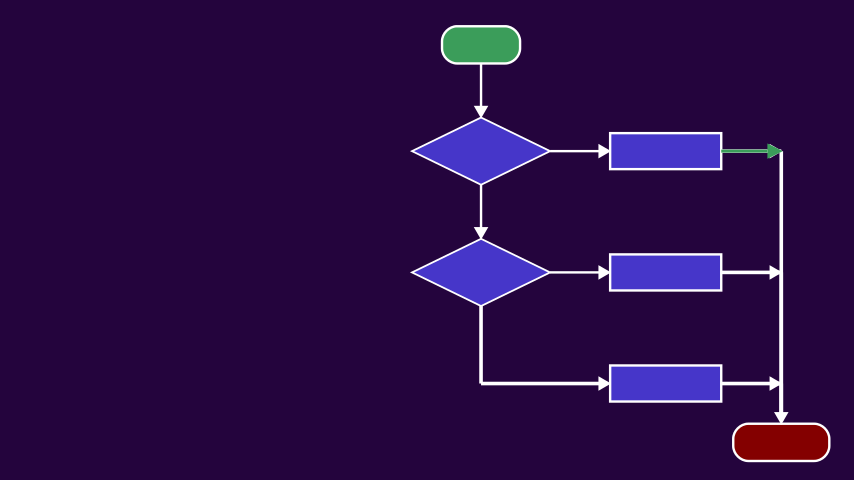

In [8]:
%%manim -ql Flux

class Flux(Scene):
    def construct(self):

############# Crear el flujograma
        # Crear los rectángulos "#840000"ondeados
        inicio = RoundedRectangle(width=1.3, height=0.62, corner_radius=0.25, color=WHITE, fill_color = "#3b9d5a", fill_opacity=1)
        fin = RoundedRectangle(width=1.6, height=0.62, corner_radius=0.25, color=WHITE, fill_color = "#840000", fill_opacity=1)
        # Crear el rombo
        vertex_up = UP * 1.12
        vertex_down = ORIGIN
        vertex_left = (vertex_up + vertex_down) / 2 - 1.15 * RIGHT
        vertex_right = (vertex_up + vertex_down) / 2 + 1.15 * RIGHT
        # Crear el rombo
        condicion = Polygon(vertex_up, vertex_right, vertex_down, vertex_left, color="#4636c9", fill_opacity=1, stroke_color=WHITE, stroke_width=3)
        condicion2 = condicion.copy()
        # Crear los rectángulos azules
        bloque_if = Rectangle(width=1.85, height=0.6, color=WHITE, fill_color = "#4636c9", fill_opacity=1)
        bloque_elif = bloque_if.copy()
        bloque_else = bloque_if.copy()
        # Posicionar los elementos
        inicio.move_to(3.25 * UP + 0.6 * LEFT)
        fin.next_to(inicio, DOWN, buff=6).shift(5*RIGHT)
        # figuras del flujograma
        condicion.next_to(inicio, DOWN, buff=0.9)
        condicion2.next_to(condicion, DOWN, buff=0.9)
        bloque_if.next_to(condicion, RIGHT, buff=1)
        bloque_elif.next_to(condicion2, RIGHT, buff=1)
        bloque_else.next_to(bloque_elif, DOWN, buff=1.25)
        # separación para que las líneas queden ubicadas correctamente respecto de los bloques
        gap = 0.05
        #codos del flujograma
        codo1 = crear_codo(condicion2.get_bottom(), bloque_else.get_left() + gap * LEFT, color=WHITE, width=6)
        codo2 = crear_codo(fin.get_top() + gap * UP, bloque_if.get_right(), color=WHITE, width=6)
        codo3 = crear_codo(fin.get_top() + gap * UP, bloque_elif.get_right(), color=WHITE, width=6)
        codo4 = crear_codo(fin.get_top() + gap * UP, bloque_else.get_right(), color=WHITE, width=6)    
        #lineas del flujograma
        linea1 = Line(inicio.get_bottom(),  condicion.get_top() + gap * UP)
        linea2 = Line(condicion.get_bottom(), condicion2.get_top() + gap * UP)
        linea3 = Line(condicion.get_right(), bloque_if.get_left() + gap * LEFT)
        linea4 = Line(condicion2.get_right(), bloque_elif.get_left() + gap * LEFT)
        # flechas sobre líneas
        flecha1 = Triangle(color=WHITE, fill_opacity=1).rotate(PI).move_to(linea1.end).scale(0.1).shift(gap *UP)
        flecha2 = flecha1.copy().move_to(linea2.end).shift(gap *UP)
        flecha3 = flecha1.copy().rotate(PI/2).move_to(linea3.end).shift(gap*LEFT)
        flecha4 = flecha1.copy().rotate(PI/2).move_to(linea4.end).shift(gap*LEFT)
        # fleachas sobre codos
        flecha5 = flecha3.copy().move_to(codo1[1].start).shift(gap*LEFT)
        flecha6 = flecha3.copy().move_to(codo2[0].end).shift((2*gap)*LEFT)
        otra_flecha = Arrow(bloque_if.get_right() + 0.25 * LEFT, flecha6.get_right() + 0.3 * RIGHT, color="#3b9d5a").shift(1.5*RIGHT)
        flecha7 = flecha3.copy().move_to(codo3[0].end).shift((2*gap)*LEFT)
        flecha8 = flecha3.copy().move_to(codo4[0].end).shift((2*gap)*LEFT)
        flecha9 = flecha1.copy().move_to(codo4[0].start).shift(gap * UP)
        # líneas adicionales para poder animar el color de los codos coherentemente, las corro 1.5 * RIGHT para seguir el shift del objeto padre
    
        linea_adicional2 = Line(flecha6.get_right() + 0.03 *RIGHT, flecha9.get_top(), color="#3b9d5a").shift(1.5 * RIGHT)
        linea_adicional3 = codo3[0].copy().set_color("#3b9d5a").shift(1.5 * RIGHT)
        linea_adicional4 = codo4[0].copy().set_color("#3b9d5a").shift(1.5 * RIGHT)   
                     
        flujograma = Group(*[inicio, fin, condicion, condicion2, bloque_if,
                             bloque_elif, bloque_else, codo1, codo2, codo3,
                             codo4, linea1, linea2, linea3, linea4,
                             flecha1, flecha2, flecha3, flecha4, flecha5,
                             flecha6, flecha7, flecha8, flecha9]).shift(1.5 * RIGHT)

        self.add(flujograma)
        self.add(otra_flecha)

In [14]:
%%manim -ql CondicionalAnidado
class CondicionalAnidado(Scene):
    def construct(self):
        # Obtener el tamaño de la pantalla
        ancho = self.camera.frame_width
        alto = self.camera.frame_height

        # Añadir logo
        logo = h.Logo()
        self.add(logo)

        def mostrar_ruta(grupo, subgrupo, grupo_fin, color, linea_auxiliar = False):
            """Recibe un grupo de objetos y un subgrupo de este.Vuelve de un color a los objetos en ese grupo
            y rellena a los objetos del subgrupo. De esta manera se muestra la ruta de un flujograma"""
            linea_aux.set_z_index(-50)
            for elemento in grupo:
                if elemento in subgrupo:
                    self.play(elemento.animate.set_fill(color), run_time = 0.75)
                else:
                    self.play(elemento.animate.set_color(color), run_time = 0.75)
            if linea_auxiliar:
                linea_aux.set_z_index(400)
            self.play(grupo_fin[0].animate.set_color(color), run_time = 0.75)       
        #############################################

        titulo = Text("Estructuras de control", font = "Arial Black").scale(0.8).shift(3.5*UP + LEFT * 3.5)
        titulo2 = Text("Condicionales anidados", font = "Arial Black").scale(0.7).shift(3.5*UP + LEFT * 4)
        # Crear el subrayado
        subrayado = Line(titulo.get_left(), titulo.get_right(),color=WHITE).shift(0.30*DOWN)
        subrayado2 = Line(titulo2.get_left(), titulo2.get_right(),color=WHITE).shift(0.30*DOWN)
        self.play(Write(titulo), Write(subrayado))
        self.wait(5)
        self.play(FadeTransform(titulo, titulo2), FadeTransform(subrayado, subrayado2))

        # crear tabla de rebajas
        rebajas_inicial = Table(
            [["Rebaja del 30 %"], ["Rebaja del 30 %"],["Rebaja del 30 %"],["Rebaja del 20 %"],["Rebaja del 20 %"],
             ["Precio de lista"], ["2 entradas al precio de 1"]],
            row_labels=[Text("Lunes"), Text("Martes"), Text("Miercoles"),Text("Jueves"), Text("Viernes"), Text("Sábado"), Text("Domingo")],
            col_labels=[Text("Promoción")],
            top_left_entry=Text("Día").shift(0.5 * LEFT),
            include_outer_lines=True,
            arrange_in_grid_config={"cell_alignment": RIGHT}
        )
        rebajas_inicial.scale(0.45)

        rebajas_intermedia = Table(
            [["Rebaja del 30 %"], ["Rebaja del 20 %"],["Rebaja del 20 %"],
             ["Precio de lista"], ["2 entradas al precio de 1"]],
            row_labels=[Text("Lu,Ma,Mi") ,Text("Jueves"), Text("Viernes"), Text("Sábado"), Text("Domingo")],
            col_labels=[Text("Promoción")],
            top_left_entry=Text("Día").shift(0.5 * LEFT),
            include_outer_lines=True,
            arrange_in_grid_config={"cell_alignment": RIGHT}
        )
        rebajas_intermedia.scale(0.45)
        
        rebajas = Table(
            [["Rebaja del 30 %"],["Rebaja del 20 %"], ["Sin descuento"], ["2 por 1"]],
            row_labels=[Text("Lun,Mar,Mie"),Text("Jue y Vie"),Text("Sábado"), Text("Domingo")],
            col_labels=[Text("Promoción")],
            top_left_entry=Text("Día").shift(0.5 * LEFT),
            include_outer_lines=True,
            arrange_in_grid_config={"cell_alignment": RIGHT}
        )
        rebajas.scale(0.45)
        self.add(rebajas_inicial)
        self.wait(3)
        self.play(FadeTransform(rebajas_inicial, rebajas_intermedia))
        self.wait(3)
        self.play(FadeTransform(rebajas_intermedia, rebajas))
        self.wait(2)
        self.play(rebajas.animate.shift(0.5 * UP + 0.75*RIGHT).scale(0.65))        
          
        ### flujograma
        origen = Dot(radius=0.15, color=BLUE)
        punto = Dot(radius=0.15, color=BLUE)
        punto2  = Dot(radius = 0.05, color=BLUE).shift(2.5*DOWN)

        # Crear los rectángulos "#840000" redondeandos
        inicio = RoundedRectangle(width=1.3, height=0.62, corner_radius=0.25, color=WHITE, fill_color = "#3b9d5a", fill_opacity=1)
        fin = RoundedRectangle(width=1.6, height=0.62, corner_radius=0.25, color=WHITE, fill_color = "#840000", fill_opacity=1)
        # Crear el rombo
        vertex_up = UP * 1.12
        vertex_down = ORIGIN
        vertex_left = (vertex_up + vertex_down) / 2 - 1.15 * RIGHT
        vertex_right = (vertex_up + vertex_down) / 2 + 1.15 * RIGHT
        # Crear el rombo
        condicion = Polygon(vertex_up, vertex_right, vertex_down, vertex_left, color="#4636c9", fill_opacity=1, stroke_color=WHITE, stroke_width=3)
        condicion2 = condicion.copy()
        condicion3 = condicion.copy()

        # Crear los rectángulos azules
        bloque_if = Rectangle(width=2, height=0.66, color=WHITE, fill_color = "#4636c9", fill_opacity=1)
        bloque_if2 = bloque_if.copy()
        bloque_else = bloque_if.copy()
        bloque_else2 = bloque_if.copy()
        gap = 0.25
        # gap para triangulos
        gapt = 0.09
        escala = 0.85
        gapc = 0.17
        
        #posicionar figuras
        inicio.shift(3.5 * UP).scale(escala)
        fin.shift(3.5*DOWN).scale(escala)
        punto.shift(2*DOWN).scale(escala)
        condicion.shift(1.5 *UP).scale(escala)
        condicion2.shift(4* LEFT + 0.5 * UP).scale(escala)
        condicion3.shift(4 * RIGHT + 0.5 * UP).scale(escala)
        bloque_if.move_to(condicion2.get_left() + 2 * DOWN).scale(escala).shift(0.5*LEFT)
        bloque_else.move_to(condicion2.get_right() + 2 * DOWN).scale(escala).shift(0.5*RIGHT)
        bloque_if2.move_to(condicion3.get_left() + 2 * DOWN).scale(escala).shift(0.5*LEFT)
        bloque_else2.move_to(condicion3.get_right() + 2 * DOWN).scale(escala).shift(0.5*RIGHT)
        # posicionar líneas
        flecha1 = Arrow(inicio.get_bottom() + UP * gap, condicion.get_top() + gap * DOWN, max_tip_length_to_length_ratio=0.23,
                         max_stroke_width_to_length_ratio = 6
                        )
        flecha_fin = Arrow(punto.get_center() + UP * gap, fin.get_top() + gap * DOWN, max_tip_length_to_length_ratio=0.16,
                         max_stroke_width_to_length_ratio = 4
                        )

        codo = crear_codo(condicion.get_left(), condicion2.get_top() + gapc * UP, color=WHITE, width=6, invertido = True)
        codo2 = crear_codo(condicion2.get_left(), bloque_if.get_top() + gapc * UP, color=WHITE, width=6,invertido = True)
        codo3 = crear_codo(bloque_if.get_bottom(), punto2.get_center() + gapc  * LEFT, color=WHITE, width=6)
        codo4 = crear_codo(condicion2.get_right(), bloque_else.get_top() +gapc * UP, color=WHITE, width=6, invertido = True)
        codo5 = crear_codo(bloque_else.get_bottom(), punto.get_center()  + gapc * LEFT, color=WHITE, width=6)
        codo6 = crear_codo(condicion.get_right(), condicion3.get_top() + gapc * UP, color=WHITE, width=6, invertido = True)
        codo7 = crear_codo(condicion3.get_left(), bloque_if2.get_top() + gapc * UP, color=WHITE, width=6, invertido = True)
        codo8 = crear_codo(bloque_if2.get_bottom(), punto.get_center() + gapc * RIGHT, color=WHITE, width=6)
        codo9 = crear_codo(condicion3.get_right(), bloque_else2.get_top() + gapc * UP, color=WHITE, width=6, invertido = True)
        codo10 = crear_codo(bloque_else2.get_bottom(), punto2.get_center()  + gapc * RIGHT, color=WHITE, width=6)
        punto_aux = Dot(radius = 0.25, color=RED).move_to(codo10[1].start  + gapc * LEFT)
        linea_aux = Line(flecha_fin.start + gap * DOWN, punto_aux.get_center() , color = WHITE)

        flecha2 = Triangle(color=WHITE, fill_opacity=1).rotate(PI).move_to(condicion2.get_top()).scale(0.08).shift(gapt *UP)
        flecha3 = flecha2.copy().move_to(bloque_if.get_top()).shift(gapt * UP)
        flecha4 = flecha2.copy().move_to(punto2.get_center()).rotate(PI/2).shift(gapt * LEFT)
        flecha5 = flecha2.copy().move_to(bloque_else.get_top()).shift(gapt * UP)
        flecha6 = flecha2.copy().move_to(punto.get_center()).rotate(PI/2).shift(gapt * LEFT)
        flecha7 = flecha2.copy().move_to(condicion3.get_top()).shift(gapt * UP)
        flecha8 = flecha2.copy().move_to(bloque_if2.get_top()).shift(gapt * UP)
        flecha9 = flecha2.copy().move_to(punto.get_center()).rotate(-PI/2).shift(gapt * RIGHT)
        flecha10= flecha2.copy().move_to(bloque_else2.get_top()).shift(gapt * UP)
        flecha11= flecha2.copy().move_to(punto2.get_center()).rotate(-PI/2).shift(gapt * RIGHT)
        
    
        flujograma = VGroup(*[inicio, fin, condicion, condicion2, condicion3, bloque_if, bloque_else, bloque_if2, bloque_else2,
                             flecha1, flecha_fin, flecha2, flecha3, flecha4, flecha5, flecha6, flecha7, flecha8, flecha9, flecha10, flecha11,
                             codo, codo2, codo3, codo4, codo5, codo6, codo7, codo8, codo9, codo10])
        flujograma.shift(0.75*RIGHT)
        linea_aux.shift(0.75*RIGHT)

        # textos
        escala_texto = 0.36
        texto_inicio = Text("Inicio", font="Arial").scale(escala_texto).move_to(inicio.get_center())
        texto_fin = Text("Fin", font="Arial").scale(escala_texto).move_to(fin.get_center())
        texto_condicion = Text("Condición 1", font="Arial").scale(escala_texto).move_to(condicion.get_center())
        texto_condicion2 = Text("Condición 2", font="Arial").scale(escala_texto).move_to(condicion2.get_center())
        texto_condicion3 = Text("Condicion 3", font="Arial").scale(escala_texto).move_to(condicion3.get_center())
        texto_bi = Text("Cuerpo if", font="Arial").scale(escala_texto).move_to(bloque_if.get_center())
        texto_be= Text("Cuerpo else", font="Arial").scale(escala_texto).move_to(bloque_else.get_center())
        texto_bi2 = Text("Cuerpo if", font="Arial").scale(escala_texto).move_to(bloque_if2.get_center())
        texto_be2 = Text("Cuerpo else", font="Arial").scale(escala_texto).move_to(bloque_else2.get_center())
        si = Text("Sí", font="Arial Black").scale(0.45).move_to(condicion.get_left() + gap *UP + 1 * LEFT)
        si2 = si.copy().move_to(condicion2.get_left() + gap*UP + 2*gap * LEFT)
        si3 = si.copy().move_to(condicion3.get_left() + gap*UP + 2*gap * LEFT)
        no = Text("No", font="Arial Black").scale(0.45).move_to(condicion.get_right() + gap *UP + 1 *RIGHT)
        no2 = no.copy().move_to(condicion2.get_right() + gap*UP + 2*gap * RIGHT)
        no3= no.copy().move_to(condicion3.get_right() + gap*UP + 2*gap * RIGHT)
        
        # textos para transformación
        mi_inicio = Text("dia", font="Arial").scale(escala_texto).move_to(inicio.get_center())
        mi_fin1 = Text("20 % off", font="Arial Black").scale(escala_texto).move_to(fin.get_center())
        mi_fin1_copia = mi_fin1.copy()
        mi_fin2 = Text("30 % off", font="Arial Black").scale(escala_texto).move_to(fin.get_center())
        mi_fin2_copia = mi_fin2.copy()
        mi_fin3 = Text("s/ desc.", font="Arial Black").scale(escala_texto).move_to(fin.get_center())
        mi_fin3_copia = mi_fin3.copy()
        mi_fin4 = Text("2x1", font="Arial Black").scale(escala_texto).move_to(fin.get_center())
        mi_condicion = Text("""     Día
de semana""", font="Arial").scale(escala_texto).move_to(condicion.get_center() + 0.05 * UP)
        mi_condicion2 = Text("""  Jueves
o Viernes""", font="Arial").scale(escala_texto).move_to(condicion2.get_center())
        mi_texto_bi = Text("print('20 % off')", font="Arial").scale(escala_texto).move_to(bloque_if.get_center())
        mi_texto_be = Text("print('30% off')", font="Arial").scale(escala_texto).move_to(bloque_else.get_center())
        mi_condicion3 = Text("Sábado", font="Arial").scale(escala_texto).move_to(condicion3.get_center())
        mi_texto_bi2 = Text("print('s/ desc.')", font="Arial").scale(escala_texto).move_to(bloque_if2.get_center())
        mi_texto_be2 = Text("print('2x1')", font="Arial").scale(escala_texto).move_to(bloque_else2.get_center())
       
        # formar grupos con los textos
        textos = Group(*[texto_inicio, texto_fin, texto_condicion, texto_condicion2, texto_condicion3, texto_bi, texto_be,
                         texto_bi2, texto_be2])
        # no incluyo los fines porque al ser cuatro conviene agregarlos uno por uno.
        textos_ejemplo = Group(*[mi_inicio, mi_condicion, mi_condicion2, mi_texto_bi, mi_texto_be,
                                mi_condicion3, mi_texto_bi2, mi_texto_be2])
        textos_inmutables = Group(*[si, si2, si3, no, no2, no3])

        path1 = VGroup(*[flecha1, condicion, si, codo, flecha2, condicion2, si2, codo2, flecha3, bloque_if, codo3, flecha4])
        path2 = VGroup(*[flecha1, condicion, si, codo, flecha2,  condicion2, no2, codo4, flecha5, bloque_else, codo5, flecha6])
        path3 = VGroup(*[flecha1, condicion, no, codo6, flecha7, condicion3, si3, codo7, flecha8, bloque_if2, codo8 ,flecha9 ])
        path4 = VGroup(*[flecha1, condicion, no, codo6,  flecha7, condicion3, no3, codo9, flecha10, bloque_else2, codo10, flecha11])
        relleno = VGroup(*[condicion, condicion2, condicion3, bloque_if, bloque_else, bloque_if2, bloque_else2])
        grupo_final = VGroup(*[flecha_fin, fin])
        
        # iniciar animación
        
        linea_aux.set_z_index(-50)
        self.play(FadeIn(flujograma, textos, textos_inmutables))
        self.add(linea_aux)
        self.wait(4)
        # mi_fin1, mi_fin2, mi_fin2, mi_fin3, mi_fin4,
        flujograma.save_state()
       
        self.play(FadeOut(textos))
        self.play(FadeIn(textos_ejemplo))
        
        mostrar_ruta(path1, relleno, grupo_final, "#3b9d5a", True)
        self.play(FadeIn(mi_fin1))
        self.wait(3)
        self.play(Restore(flujograma), FadeOut(mi_fin1), si.animate.set_color(WHITE), si2.animate.set_color(WHITE) ,run_time=2)
        self.wait(2)
        mostrar_ruta(path2, relleno, grupo_final, "#3b9d5a", False)
        self.play(FadeIn(mi_fin2))
        self.wait(3)
        self.play(Restore(flujograma), FadeOut(mi_fin2), si.animate.set_color(WHITE), no2.animate.set_color(WHITE), run_time=2)
        self.wait(2)
        mostrar_ruta(path3, relleno, grupo_final, "#3b9d5a", False)
        self.play(FadeIn(mi_fin3))
        self.wait(3)
        self.play(Restore(flujograma), FadeOut(mi_fin3), no.animate.set_color(WHITE), si3.animate.set_color(WHITE), run_time=2)
        self.wait(2)
        mostrar_ruta(path4, relleno, grupo_final, "#3b9d5a", True)
        self.play(FadeIn(mi_fin4))
        
        self.wait(5)

In [10]:
%%manim -ql Tabla
class Tabla(Scene):
    def construct(self):

# crear tabla de rebajas
        rebajas_inicial = Table(
            [["Rebaja del 30 %"], ["Rebaja del 30 %"],["Rebaja del 30 %"],["Rebaja del 20 %"],["Rebaja del 20 %"],
             ["Precio de lista"], ["2 entradas al precio de 1"]],
            row_labels=[Text("Lunes"), Text("Martes"), Text("Miercoles"),Text("Jueves"), Text("Viernes"), Text("Sábado"), Text("Domingo")],
            col_labels=[Text("Promoción")],
            top_left_entry=Text("Día").shift(0.5 * LEFT),
            include_outer_lines=True,
            arrange_in_grid_config={"cell_alignment": RIGHT}
        )
        rebajas_inicial.scale(0.45)

        rebajas_intermedia = Table(
            [["Rebaja del 30 %"], ["Rebaja del 20 %"],["Rebaja del 20 %"],
             ["Precio de lista"], ["2 entradas al precio de 1"]],
            row_labels=[Text("Lu,Ma,Mi") ,Text("Jueves"), Text("Viernes"), Text("Sábado"), Text("Domingo")],
            col_labels=[Text("Promoción")],
            top_left_entry=Text("Día").shift(0.5 * LEFT),
            include_outer_lines=True,
            arrange_in_grid_config={"cell_alignment": RIGHT}
        )
        rebajas_intermedia.scale(0.45)
        


        rebajas = Table(
            [["Rebaja del 30 %"],["Rebaja del 20 %"], ["Sin descuento"], ["2 por 1"]],
            row_labels=[Text("Lun,Mar,Mie"),Text("Jue y Vie"),Text("Sábado"), Text("Domingo")],
            col_labels=[Text("Promoción")],
            top_left_entry=Text("Día").shift(0.5 * LEFT),
            include_outer_lines=True,
            arrange_in_grid_config={"cell_alignment": RIGHT}
        )
        rebajas.scale(0.45)
        self.add(rebajas_inicial)
        self.wait(3)
        self.play(FadeTransform(rebajas_inicial, rebajas_intermedia))
        self.wait(3)
        self.play(FadeTransform(rebajas_intermedia, rebajas))
        self.wait(2)
        self.play(rebajas.animate.shift(0.5 * UP + 0.75*RIGHT).scale(0.65))

        self.wait(5)